# **Import and Clean the data**

In [ ]:
import pandas as pd
import numpy as np
import math
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as M
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
np.random.seed(999)

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df = df.sample(frac= 1,random_state = 999,ignore_index= True)

In [ ]:
df = df.drop_duplicates()

In [ ]:
import sklearn
# features = ['Time','Amount']
features = df.columns.tolist()
features.remove('Class')
for col in features:
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
  scaler2 = MinMaxScaler()
  df[col] = scaler2.fit_transform(df[col].values.reshape(-1,1))

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.259833,0.906647,0.756090,0.862915,0.243900,0.752021,0.272856,0.274835,0.772759,0.491378,...,0.562683,0.487450,0.653146,0.465675,0.577687,0.573702,0.435729,0.306409,0.026184,0
1,0.894376,0.993751,0.764630,0.810842,0.254221,0.768001,0.260832,0.264981,0.785338,0.483062,...,0.556299,0.468523,0.668683,0.220546,0.563862,0.467328,0.414983,0.311396,0.000050,0
2,0.471341,0.883365,0.667174,0.777266,0.325616,0.743176,0.259769,0.291082,0.773293,0.489967,...,0.590175,0.447877,0.623711,0.462762,0.571252,0.283764,0.406878,0.323842,0.115442,0
3,0.920807,0.869452,0.766881,0.805530,0.273265,0.785185,0.255576,0.257454,0.755801,0.453375,...,0.603049,0.439698,0.628440,0.391869,0.636058,0.348823,0.429234,0.285646,0.000784,0
4,0.272026,0.980097,0.771003,0.840161,0.278853,0.764459,0.254319,0.265871,0.783388,0.464236,...,0.556472,0.468626,0.666689,0.380581,0.592936,0.444474,0.416091,0.313677,0.000035,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.270151,0.938218,0.766803,0.854502,0.237220,0.755187,0.261940,0.271401,0.790390,0.452630,...,0.562405,0.490374,0.676737,0.452850,0.547518,0.544344,0.413347,0.314809,0.011525,0
284803,0.060628,0.980029,0.769729,0.832210,0.269878,0.769249,0.265894,0.264485,0.785349,0.506024,...,0.553612,0.450194,0.663873,0.178259,0.598338,0.448995,0.415308,0.313140,0.001246,0
284804,0.488975,0.979397,0.761323,0.844171,0.200769,0.762358,0.269164,0.260137,0.789600,0.525228,...,0.561107,0.516166,0.663219,0.226344,0.606764,0.327761,0.418306,0.313274,0.000039,0
284805,0.343679,0.968773,0.746582,0.851336,0.238354,0.755532,0.273437,0.259315,0.789855,0.458707,...,0.566191,0.525769,0.662286,0.350128,0.582480,0.387154,0.416936,0.314365,0.012349,0


In [ ]:
Counter(df['Class'])

Counter({0: 283253, 1: 473})

# **Train Test Split**

In [ ]:
fraud_df = df[df['Class'] == 1]
not_fraud_df = df[df['Class'] == 0]
not_fraud_df.reset_index(drop=True, inplace=True)
fraud_df.reset_index(drop=True, inplace=True)
not_fraud_df = not_fraud_df.head(15000)

In [ ]:
fraud_df = fraud_df.sample(frac=1).reset_index(drop=True)
not_fraud_df = not_fraud_df.sample(frac=1).reset_index(drop=True)

In [ ]:
fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.701641,0.913632,0.791270,0.772512,0.306320,0.758089,0.250388,0.254680,0.788408,0.401037,...,0.575516,0.569252,0.661491,0.317480,0.587430,0.441143,0.417804,0.314418,0.005629,1
1,0.044041,0.970622,0.791536,0.745053,0.429587,0.754067,0.245604,0.241178,0.796796,0.446035,...,0.570985,0.515141,0.674360,0.333091,0.474450,0.482932,0.427485,0.315140,0.000039,1
2,0.900863,0.925529,0.815811,0.713964,0.505320,0.772627,0.230957,0.251576,0.798098,0.309763,...,0.571189,0.484780,0.660167,0.287708,0.576168,0.431014,0.427094,0.319104,0.000030,1
3,0.091538,0.879434,0.797880,0.810157,0.363077,0.759847,0.252554,0.255645,0.750471,0.528540,...,0.593133,0.499889,0.657275,0.469221,0.558004,0.325518,0.344377,0.299502,0.000443,1
4,0.189164,0.963186,0.785499,0.808784,0.420981,0.758372,0.253119,0.251939,0.791340,0.392716,...,0.565706,0.480477,0.666813,0.407515,0.598603,0.403809,0.427153,0.319412,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.781876,0.989929,0.765949,0.802934,0.268891,0.768901,0.256238,0.267175,0.782356,0.490409,...,0.558188,0.486172,0.666590,0.434562,0.578350,0.405687,0.416150,0.313249,0.004224,1
469,0.048700,0.954022,0.812772,0.717995,0.553226,0.769865,0.233196,0.250511,0.790634,0.346633,...,0.570134,0.484554,0.656445,0.346695,0.664346,0.510973,0.432957,0.324747,0.000039,1
470,0.743501,0.973739,0.781373,0.759700,0.395794,0.762904,0.255357,0.250087,0.792832,0.446673,...,0.570939,0.537745,0.661689,0.426087,0.609496,0.383586,0.428558,0.319615,0.002643,1
471,0.248785,0.883144,0.784648,0.717251,0.468904,0.731530,0.263129,0.244587,0.800503,0.350456,...,0.572737,0.532772,0.683681,0.310114,0.599702,0.423902,0.458967,0.314772,0.025223,1


In [ ]:
not_fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.834437,0.953658,0.777309,0.824587,0.221600,0.767454,0.249699,0.269563,0.787434,0.464517,...,0.569139,0.579738,0.662777,0.377279,0.537577,0.558852,0.421934,0.317844,1.136578e-04,0
1,0.297207,0.946790,0.774374,0.886049,0.402159,0.757478,0.277323,0.258781,0.793072,0.471673,...,0.566752,0.580545,0.666512,0.466885,0.514739,0.462452,0.412996,0.312007,1.732113e-04,0
2,0.423214,0.977727,0.771435,0.835326,0.296679,0.769109,0.264111,0.267245,0.786060,0.440555,...,0.563287,0.529706,0.663994,0.347064,0.615872,0.386332,0.416909,0.313012,3.892389e-05,0
3,0.476822,0.979987,0.773981,0.827497,0.290784,0.766297,0.248286,0.267746,0.782137,0.458432,...,0.558949,0.491006,0.664245,0.418112,0.609425,0.485851,0.415912,0.313982,2.958216e-05,0
4,0.635660,0.993471,0.767024,0.811838,0.259875,0.768939,0.259737,0.264854,0.783613,0.528293,...,0.563587,0.543017,0.664967,0.412636,0.596648,0.346704,0.415927,0.311721,3.892389e-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.463621,0.927305,0.775177,0.856827,0.303292,0.764476,0.261047,0.265305,0.787559,0.456492,...,0.558950,0.491715,0.663699,0.374360,0.591311,0.512009,0.402065,0.318137,5.336466e-04,0
14996,0.336653,0.926948,0.775934,0.854133,0.255774,0.768231,0.273905,0.265318,0.791732,0.479054,...,0.559914,0.518362,0.662568,0.303231,0.558298,0.470873,0.411349,0.307627,1.006961e-03,0
14997,0.938718,0.959844,0.777897,0.831900,0.249705,0.769176,0.246890,0.271084,0.782708,0.464327,...,0.566237,0.560152,0.663612,0.425786,0.555107,0.399272,0.423656,0.317084,2.024043e-04,0
14998,0.514706,0.895049,0.805058,0.787452,0.209676,0.756670,0.251497,0.259421,0.809341,0.483586,...,0.555864,0.468636,0.670255,0.290376,0.585950,0.458192,0.419789,0.312818,3.495366e-04,0


In [ ]:
fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.701641,0.913632,0.791270,0.772512,0.306320,0.758089,0.250388,0.254680,0.788408,0.401037,...,0.575516,0.569252,0.661491,0.317480,0.587430,0.441143,0.417804,0.314418,0.005629,1
1,0.044041,0.970622,0.791536,0.745053,0.429587,0.754067,0.245604,0.241178,0.796796,0.446035,...,0.570985,0.515141,0.674360,0.333091,0.474450,0.482932,0.427485,0.315140,0.000039,1
2,0.900863,0.925529,0.815811,0.713964,0.505320,0.772627,0.230957,0.251576,0.798098,0.309763,...,0.571189,0.484780,0.660167,0.287708,0.576168,0.431014,0.427094,0.319104,0.000030,1
3,0.091538,0.879434,0.797880,0.810157,0.363077,0.759847,0.252554,0.255645,0.750471,0.528540,...,0.593133,0.499889,0.657275,0.469221,0.558004,0.325518,0.344377,0.299502,0.000443,1
4,0.189164,0.963186,0.785499,0.808784,0.420981,0.758372,0.253119,0.251939,0.791340,0.392716,...,0.565706,0.480477,0.666813,0.407515,0.598603,0.403809,0.427153,0.319412,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.781876,0.989929,0.765949,0.802934,0.268891,0.768901,0.256238,0.267175,0.782356,0.490409,...,0.558188,0.486172,0.666590,0.434562,0.578350,0.405687,0.416150,0.313249,0.004224,1
469,0.048700,0.954022,0.812772,0.717995,0.553226,0.769865,0.233196,0.250511,0.790634,0.346633,...,0.570134,0.484554,0.656445,0.346695,0.664346,0.510973,0.432957,0.324747,0.000039,1
470,0.743501,0.973739,0.781373,0.759700,0.395794,0.762904,0.255357,0.250087,0.792832,0.446673,...,0.570939,0.537745,0.661689,0.426087,0.609496,0.383586,0.428558,0.319615,0.002643,1
471,0.248785,0.883144,0.784648,0.717251,0.468904,0.731530,0.263129,0.244587,0.800503,0.350456,...,0.572737,0.532772,0.683681,0.310114,0.599702,0.423902,0.458967,0.314772,0.025223,1


In [ ]:
training_size = 10000
test_size = 5000

train_pos,test_pos = train_test_split(fraud_df,test_size = float(1)/3)
train_neg,test_neg = train_test_split(not_fraud_df,test_size = float(1)/3)

In [ ]:
df_train = train_pos.append(train_neg.head(training_size - train_pos.shape[0]),ignore_index = True)
df_test = test_pos.append(test_neg.head(test_size - test_pos.shape[0]),ignore_index = True)

In [ ]:
df_train = df_train.sample(frac= 1,random_state = 999,ignore_index= True)
df_test = df_test.sample(frac= 1,random_state = 999,ignore_index= True)

In [ ]:
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.816143,0.994717,0.758602,0.807964,0.207823,0.763926,0.253062,0.264255,0.782164,0.443368,...,0.562474,0.507096,0.668530,0.460012,0.572543,0.369917,0.415298,0.312107,0.002485,0
1,0.700299,0.950996,0.788920,0.801534,0.262132,0.768199,0.250023,0.261963,0.759589,0.454013,...,0.543998,0.557167,0.666934,0.352897,0.560977,0.401240,0.419432,0.314929,0.000039,0
2,0.467776,0.945721,0.780092,0.851332,0.298633,0.767083,0.270437,0.266246,0.793348,0.441129,...,0.561663,0.520216,0.662750,0.294017,0.577110,0.393602,0.421976,0.315652,0.000576,0
3,0.836989,0.993805,0.771973,0.796009,0.300290,0.773493,0.251951,0.271774,0.779802,0.441378,...,0.566893,0.565088,0.661110,0.336822,0.629910,0.393986,0.415529,0.311262,0.000039,0
4,0.841989,0.933623,0.790420,0.805507,0.189040,0.771559,0.249041,0.272917,0.786415,0.477385,...,0.563354,0.542330,0.663936,0.463017,0.578795,0.440312,0.430852,0.324044,0.000030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.474212,0.978484,0.768286,0.839332,0.272672,0.765501,0.258392,0.266673,0.782832,0.459754,...,0.557331,0.471025,0.664815,0.325118,0.597271,0.447543,0.415862,0.313631,0.002724,0
9996,0.181357,0.949102,0.780981,0.847191,0.281786,0.768729,0.264838,0.268281,0.789575,0.430900,...,0.564566,0.535019,0.663001,0.284338,0.569090,0.383873,0.417711,0.315014,0.000882,0
9997,0.454425,0.978459,0.767248,0.856330,0.306117,0.761079,0.263947,0.262145,0.786308,0.491453,...,0.560068,0.509390,0.664329,0.368762,0.606072,0.363399,0.417911,0.313826,0.000389,0
9998,0.780991,0.993729,0.765050,0.808614,0.253532,0.768011,0.258871,0.265154,0.784634,0.485740,...,0.565293,0.545360,0.663861,0.243574,0.593977,0.417002,0.415999,0.311475,0.000039,0


In [ ]:
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.964906,0.989866,0.770722,0.841932,0.422713,0.764521,0.266554,0.262739,0.785748,0.447291,...,0.565351,0.550603,0.667035,0.370702,0.570964,0.439968,0.416947,0.312539,0.000590,0
1,0.301206,0.979363,0.769402,0.844351,0.270843,0.764051,0.258228,0.265138,0.784874,0.455228,...,0.557851,0.478416,0.666641,0.382622,0.591208,0.441262,0.415917,0.313244,0.000077,0
2,0.490243,0.978929,0.771074,0.842507,0.280121,0.764922,0.257134,0.265714,0.784233,0.459889,...,0.557422,0.479508,0.667667,0.389549,0.587374,0.445324,0.416481,0.313711,0.000050,0
3,0.321635,0.946347,0.768798,0.859618,0.167065,0.751672,0.259450,0.259868,0.779634,0.384397,...,0.574613,0.518448,0.665999,0.434108,0.575495,0.401515,0.414750,0.312087,0.003114,0
4,0.370063,0.978898,0.767220,0.850187,0.294888,0.760092,0.254973,0.264344,0.784391,0.485987,...,0.560247,0.510719,0.664888,0.486187,0.607508,0.494044,0.416183,0.313371,0.000039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.443070,0.940401,0.755520,0.876821,0.191642,0.760505,0.255188,0.262235,0.786148,0.433791,...,0.563072,0.526882,0.671242,0.440144,0.539521,0.569853,0.417535,0.316842,0.004901,0
4996,0.254711,0.982706,0.749682,0.824455,0.158427,0.769670,0.302216,0.254190,0.795527,0.423755,...,0.556352,0.488912,0.663848,0.520003,0.615639,0.412506,0.417605,0.313553,0.002161,0
4997,0.751655,0.950517,0.781657,0.858897,0.384127,0.772005,0.264992,0.273128,0.784797,0.412500,...,0.564108,0.541797,0.660349,0.392946,0.590787,0.448657,0.418610,0.316187,0.001107,0
4998,0.875833,0.933971,0.770517,0.816389,0.239016,0.775010,0.250164,0.268147,0.789631,0.458049,...,0.561401,0.504352,0.656631,0.472166,0.596921,0.378016,0.419945,0.307851,0.001129,0


In [ ]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [ ]:
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.816143,0.994717,0.758602,0.807964,0.207823,0.763926,0.253062,0.264255,0.782164,0.443368,...,0.562474,0.507096,0.668530,0.460012,0.572543,0.369917,0.415298,0.312107,0.002485,0
1,0.700299,0.950996,0.788920,0.801534,0.262132,0.768199,0.250023,0.261963,0.759589,0.454013,...,0.543998,0.557167,0.666934,0.352897,0.560977,0.401240,0.419432,0.314929,0.000039,0
2,0.467776,0.945721,0.780092,0.851332,0.298633,0.767083,0.270437,0.266246,0.793348,0.441129,...,0.561663,0.520216,0.662750,0.294017,0.577110,0.393602,0.421976,0.315652,0.000576,0
3,0.836989,0.993805,0.771973,0.796009,0.300290,0.773493,0.251951,0.271774,0.779802,0.441378,...,0.566893,0.565088,0.661110,0.336822,0.629910,0.393986,0.415529,0.311262,0.000039,0
4,0.841989,0.933623,0.790420,0.805507,0.189040,0.771559,0.249041,0.272917,0.786415,0.477385,...,0.563354,0.542330,0.663936,0.463017,0.578795,0.440312,0.430852,0.324044,0.000030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.474212,0.978484,0.768286,0.839332,0.272672,0.765501,0.258392,0.266673,0.782832,0.459754,...,0.557331,0.471025,0.664815,0.325118,0.597271,0.447543,0.415862,0.313631,0.002724,0
9996,0.181357,0.949102,0.780981,0.847191,0.281786,0.768729,0.264838,0.268281,0.789575,0.430900,...,0.564566,0.535019,0.663001,0.284338,0.569090,0.383873,0.417711,0.315014,0.000882,0
9997,0.454425,0.978459,0.767248,0.856330,0.306117,0.761079,0.263947,0.262145,0.786308,0.491453,...,0.560068,0.509390,0.664329,0.368762,0.606072,0.363399,0.417911,0.313826,0.000389,0
9998,0.780991,0.993729,0.765050,0.808614,0.253532,0.768011,0.258871,0.265154,0.784634,0.485740,...,0.565293,0.545360,0.663861,0.243574,0.593977,0.417002,0.415999,0.311475,0.000039,0


In [ ]:
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.964906,0.989866,0.770722,0.841932,0.422713,0.764521,0.266554,0.262739,0.785748,0.447291,...,0.565351,0.550603,0.667035,0.370702,0.570964,0.439968,0.416947,0.312539,0.000590,0
1,0.301206,0.979363,0.769402,0.844351,0.270843,0.764051,0.258228,0.265138,0.784874,0.455228,...,0.557851,0.478416,0.666641,0.382622,0.591208,0.441262,0.415917,0.313244,0.000077,0
2,0.490243,0.978929,0.771074,0.842507,0.280121,0.764922,0.257134,0.265714,0.784233,0.459889,...,0.557422,0.479508,0.667667,0.389549,0.587374,0.445324,0.416481,0.313711,0.000050,0
3,0.321635,0.946347,0.768798,0.859618,0.167065,0.751672,0.259450,0.259868,0.779634,0.384397,...,0.574613,0.518448,0.665999,0.434108,0.575495,0.401515,0.414750,0.312087,0.003114,0
4,0.370063,0.978898,0.767220,0.850187,0.294888,0.760092,0.254973,0.264344,0.784391,0.485987,...,0.560247,0.510719,0.664888,0.486187,0.607508,0.494044,0.416183,0.313371,0.000039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.443070,0.940401,0.755520,0.876821,0.191642,0.760505,0.255188,0.262235,0.786148,0.433791,...,0.563072,0.526882,0.671242,0.440144,0.539521,0.569853,0.417535,0.316842,0.004901,0
4996,0.254711,0.982706,0.749682,0.824455,0.158427,0.769670,0.302216,0.254190,0.795527,0.423755,...,0.556352,0.488912,0.663848,0.520003,0.615639,0.412506,0.417605,0.313553,0.002161,0
4997,0.751655,0.950517,0.781657,0.858897,0.384127,0.772005,0.264992,0.273128,0.784797,0.412500,...,0.564108,0.541797,0.660349,0.392946,0.590787,0.448657,0.418610,0.316187,0.001107,0
4998,0.875833,0.933971,0.770517,0.816389,0.239016,0.775010,0.250164,0.268147,0.789631,0.458049,...,0.561401,0.504352,0.656631,0.472166,0.596921,0.378016,0.419945,0.307851,0.001129,0


In [ ]:
df_train['Class'].value_counts()

0    9685
1     315
Name: Class, dtype: int64

In [ ]:
df_test['Class'].value_counts()

0    4842
1     158
Name: Class, dtype: int64

In [ ]:
df_train.to_csv("train_creditcard.csv",index = False)
df_test.to_csv("test_creditcard.csv",index = False)

# **Feature Analysis**

In [ ]:
df_train = pd.read_csv("train_creditcard.csv")
df_test = pd.read_csv("test_creditcard.csv")

In [ ]:
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.816143,0.994717,0.758602,0.807964,0.207823,0.763926,0.253062,0.264255,0.782164,0.443368,...,0.562474,0.507096,0.668530,0.460012,0.572543,0.369917,0.415298,0.312107,0.002485,0
1,0.700299,0.950996,0.788920,0.801534,0.262132,0.768199,0.250023,0.261963,0.759589,0.454013,...,0.543998,0.557167,0.666934,0.352897,0.560977,0.401240,0.419432,0.314929,0.000039,0
2,0.467776,0.945721,0.780092,0.851332,0.298633,0.767083,0.270437,0.266246,0.793348,0.441129,...,0.561663,0.520216,0.662750,0.294017,0.577110,0.393602,0.421976,0.315652,0.000576,0
3,0.836989,0.993805,0.771973,0.796009,0.300290,0.773493,0.251951,0.271774,0.779802,0.441378,...,0.566893,0.565088,0.661110,0.336822,0.629910,0.393986,0.415529,0.311262,0.000039,0
4,0.841989,0.933623,0.790420,0.805507,0.189040,0.771559,0.249041,0.272917,0.786415,0.477385,...,0.563354,0.542330,0.663936,0.463017,0.578795,0.440312,0.430852,0.324044,0.000030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.474212,0.978484,0.768286,0.839332,0.272672,0.765501,0.258392,0.266673,0.782832,0.459754,...,0.557331,0.471025,0.664815,0.325118,0.597271,0.447543,0.415862,0.313631,0.002724,0
9996,0.181357,0.949102,0.780981,0.847191,0.281786,0.768729,0.264838,0.268281,0.789575,0.430900,...,0.564566,0.535019,0.663001,0.284338,0.569090,0.383873,0.417711,0.315014,0.000882,0
9997,0.454425,0.978459,0.767248,0.856330,0.306117,0.761079,0.263947,0.262145,0.786308,0.491453,...,0.560068,0.509390,0.664329,0.368762,0.606072,0.363399,0.417911,0.313826,0.000389,0
9998,0.780991,0.993729,0.765050,0.808614,0.253532,0.768011,0.258871,0.265154,0.784634,0.485740,...,0.565293,0.545360,0.663861,0.243574,0.593977,0.417002,0.415999,0.311475,0.000039,0


In [ ]:
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.964906,0.989866,0.770722,0.841932,0.422713,0.764521,0.266554,0.262739,0.785748,0.447291,...,0.565351,0.550603,0.667035,0.370702,0.570964,0.439968,0.416947,0.312539,0.000590,0
1,0.301206,0.979363,0.769402,0.844351,0.270843,0.764051,0.258228,0.265138,0.784874,0.455228,...,0.557851,0.478416,0.666641,0.382622,0.591208,0.441262,0.415917,0.313244,0.000077,0
2,0.490243,0.978929,0.771074,0.842507,0.280121,0.764922,0.257134,0.265714,0.784233,0.459889,...,0.557422,0.479508,0.667667,0.389549,0.587374,0.445324,0.416481,0.313711,0.000050,0
3,0.321635,0.946347,0.768798,0.859618,0.167065,0.751672,0.259450,0.259868,0.779634,0.384397,...,0.574613,0.518448,0.665999,0.434108,0.575495,0.401515,0.414750,0.312087,0.003114,0
4,0.370063,0.978898,0.767220,0.850187,0.294888,0.760092,0.254973,0.264344,0.784391,0.485987,...,0.560247,0.510719,0.664888,0.486187,0.607508,0.494044,0.416183,0.313371,0.000039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.443070,0.940401,0.755520,0.876821,0.191642,0.760505,0.255188,0.262235,0.786148,0.433791,...,0.563072,0.526882,0.671242,0.440144,0.539521,0.569853,0.417535,0.316842,0.004901,0
4996,0.254711,0.982706,0.749682,0.824455,0.158427,0.769670,0.302216,0.254190,0.795527,0.423755,...,0.556352,0.488912,0.663848,0.520003,0.615639,0.412506,0.417605,0.313553,0.002161,0
4997,0.751655,0.950517,0.781657,0.858897,0.384127,0.772005,0.264992,0.273128,0.784797,0.412500,...,0.564108,0.541797,0.660349,0.392946,0.590787,0.448657,0.418610,0.316187,0.001107,0
4998,0.875833,0.933971,0.770517,0.816389,0.239016,0.775010,0.250164,0.268147,0.789631,0.458049,...,0.561401,0.504352,0.656631,0.472166,0.596921,0.378016,0.419945,0.307851,0.001129,0


In [ ]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.544619,0.955964,0.768446,0.833699,0.257672,0.765057,0.262516,0.264468,0.785603,0.460441,...,0.561797,0.510101,0.665486,0.382523,0.578094,0.424831,0.416554,0.313198,0.003468,0.031500
std,0.275335,0.040429,0.018864,0.039052,0.073123,0.011367,0.013503,0.011639,0.016737,0.043509,...,0.014764,0.034940,0.009605,0.080763,0.029710,0.077817,0.008521,0.006790,0.008715,0.174673
min,0.000220,0.439247,0.491504,0.298431,0.028183,0.571731,0.173341,0.000000,0.345109,0.000000,...,0.193973,0.095452,0.379490,0.001919,0.309503,0.185106,0.269290,0.144788,0.000000,0.000000
25%,0.309333,0.941755,0.761208,0.819659,0.216035,0.761019,0.254964,0.261768,0.783094,0.438932,...,0.557768,0.484639,0.663011,0.335787,0.559853,0.370953,0.415211,0.312034,0.000214,0.000000
50%,0.488457,0.957799,0.768207,0.839590,0.253849,0.765222,0.260042,0.265516,0.785595,0.460193,...,0.561135,0.510505,0.665245,0.388223,0.579118,0.416550,0.416539,0.313361,0.000899,0.000000
75%,0.804532,0.980587,0.776334,0.854566,0.287206,0.769702,0.266411,0.268798,0.789009,0.483864,...,0.564700,0.535137,0.667697,0.440860,0.598129,0.465291,0.418312,0.314794,0.003083,0.000000
max,1.000000,0.999449,1.000000,0.904403,0.780667,0.844073,0.476068,0.425272,1.000000,0.748501,...,1.000000,0.900117,0.855512,0.859572,0.771382,0.907789,0.509878,0.623012,0.230352,1.000000


In [ ]:
df_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,0.551688,0.956700,0.768059,0.833543,0.256489,0.765356,0.262830,0.264561,0.785734,0.460573,...,0.561709,0.509398,0.665349,0.385168,0.577390,0.424788,0.416654,0.313289,0.003550,0.03160
std,0.275079,0.039321,0.020181,0.036898,0.073712,0.010793,0.013802,0.011134,0.014517,0.042294,...,0.012654,0.034495,0.010313,0.080217,0.030368,0.078749,0.007962,0.008472,0.011813,0.17495
min,0.000231,0.379112,0.322274,0.345153,0.051967,0.620460,0.187602,0.062858,0.514691,0.089274,...,0.358120,0.215170,0.463237,0.088886,0.322656,0.167829,0.291322,0.189371,0.000000,0.00000
25%,0.314430,0.942021,0.761109,0.819133,0.214939,0.760848,0.255060,0.261798,0.783185,0.439118,...,0.557763,0.483976,0.663063,0.336736,0.559238,0.371591,0.415179,0.312087,0.000194,0.00000
50%,0.496554,0.958460,0.768137,0.838936,0.250612,0.765351,0.260010,0.265449,0.785648,0.460432,...,0.561037,0.509192,0.665282,0.388456,0.579234,0.415472,0.416550,0.313372,0.000778,0.00000
75%,0.811862,0.980515,0.776200,0.854289,0.286624,0.770031,0.266672,0.268836,0.789060,0.482543,...,0.564621,0.533723,0.667755,0.443028,0.597446,0.463070,0.418313,0.314809,0.002972,0.00000
max,0.999630,0.999057,0.943445,0.900149,0.813703,0.837470,0.384965,0.425199,0.977435,0.738683,...,0.791502,0.779392,0.926907,0.860060,0.769360,0.871993,0.487262,0.630082,0.502544,1.00000


In [ ]:
features = df_train.columns.tolist()
features.remove('Class')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


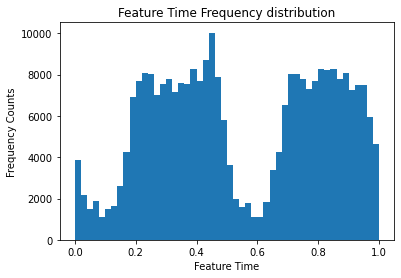

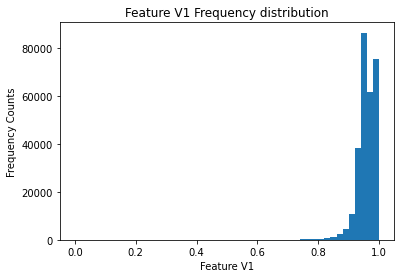

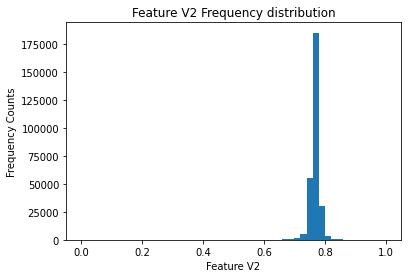

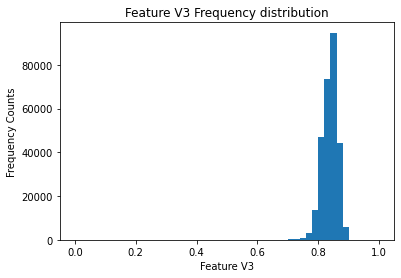

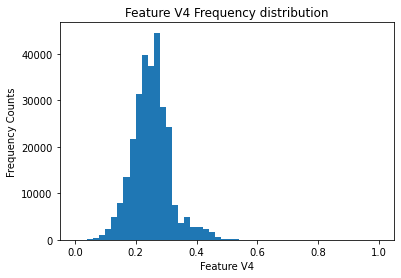

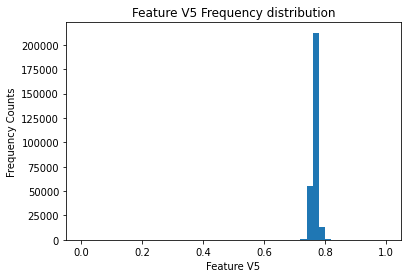

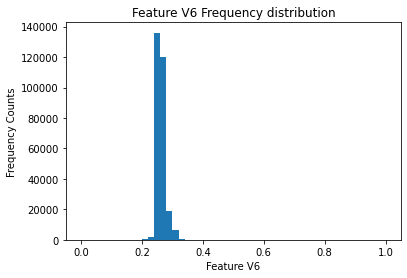

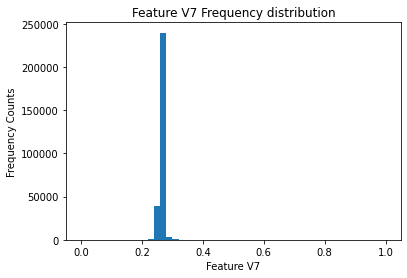

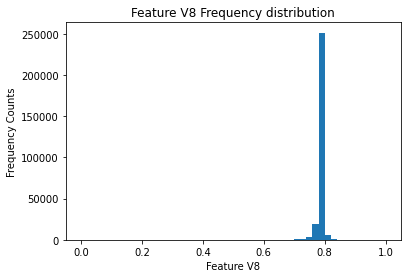

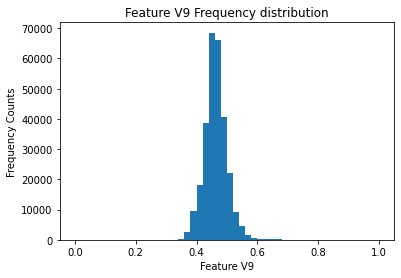

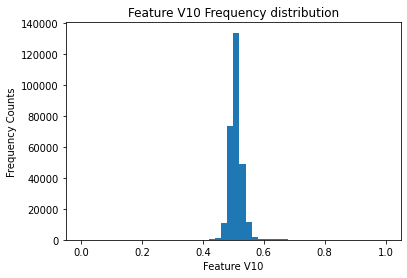

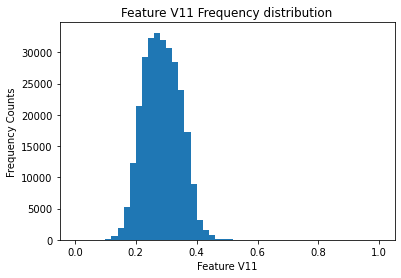

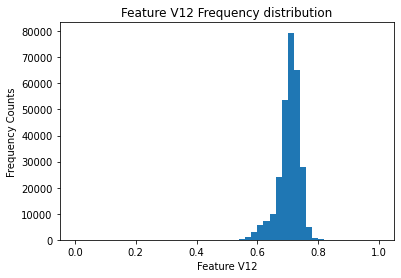

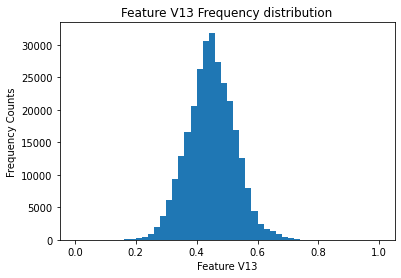

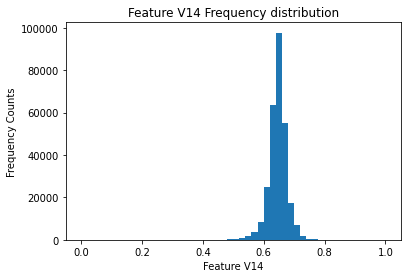

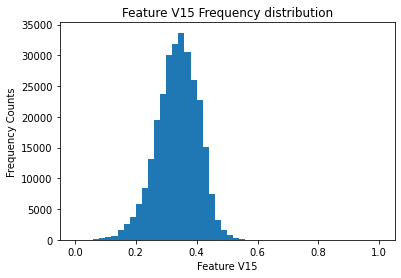

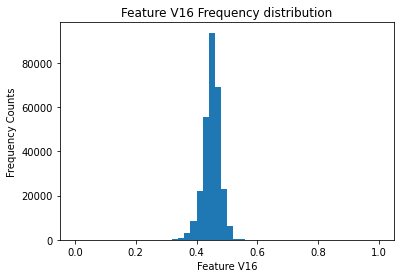

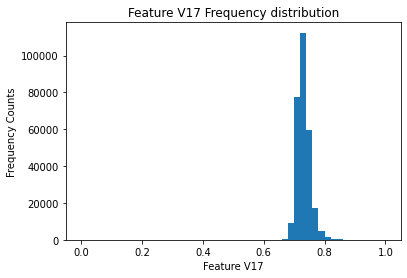

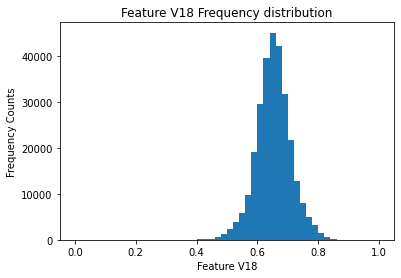

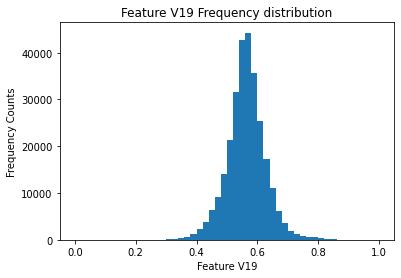

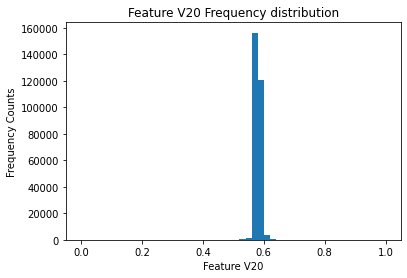

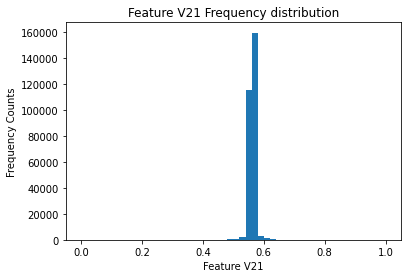

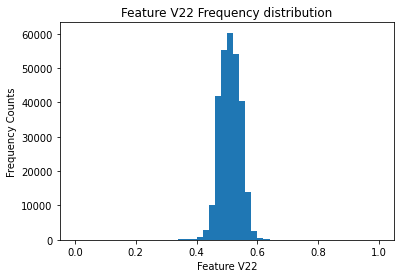

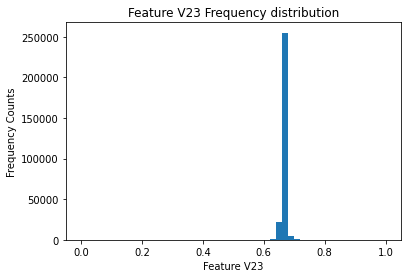

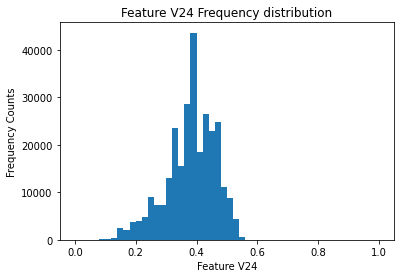

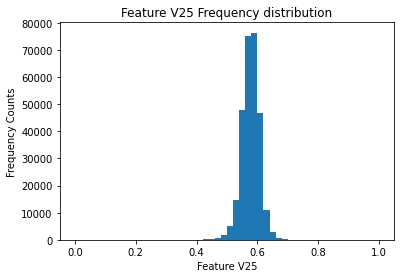

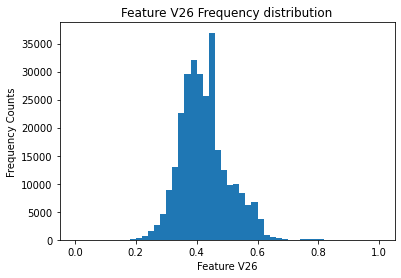

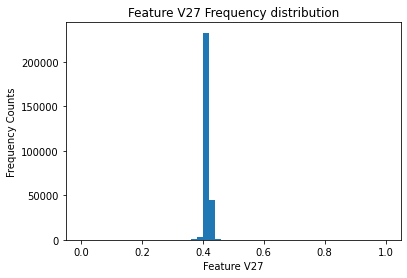

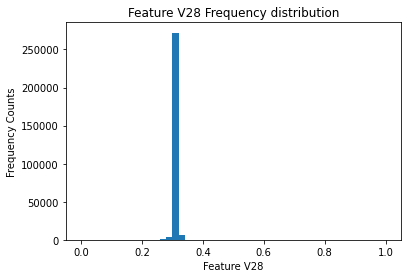

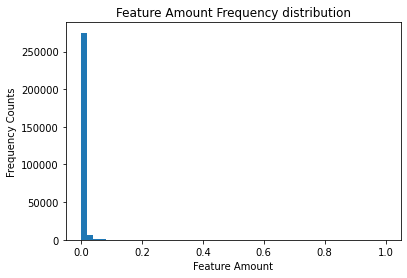

In [ ]:
for f in features:
  X = df[f].values
  plt.figure()
  plt.hist(X,bins = 50)
  plt.title(f"Feature {f} Frequency distribution")
  plt.xlabel(f"Feature {f}")
  plt.ylabel("Frequency Counts")

# **Modelling and Data augmentation**

In [ ]:
pos_data = df_train[df_train['Class'] == 1]
pos_data = pos_data.drop(['Class'], axis = 1)
pos_data = pos_data.reset_index(drop = True)
pos_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.580455,0.578733,0.931188,0.441192,0.564157,0.670236,0.258363,0.093466,0.628690,0.136160,...,0.623920,0.414616,0.704043,0.686417,0.433816,0.603006,0.322079,0.335663,0.303629,0.000039
1,0.244496,0.915414,0.789397,0.751705,0.538145,0.787083,0.232266,0.264230,0.781197,0.337050,...,0.578532,0.561930,0.520311,0.679933,0.343084,0.643077,0.533904,0.424928,0.304891,0.000039
2,0.780869,0.978764,0.801425,0.733263,0.505531,0.776140,0.239684,0.260592,0.786207,0.360253,...,0.583866,0.563065,0.470571,0.664970,0.438983,0.599706,0.434602,0.425589,0.320041,0.000000
3,0.487314,0.942361,0.803797,0.725729,0.470570,0.750677,0.239980,0.230657,0.799747,0.313882,...,0.592292,0.578673,0.485696,0.660683,0.327545,0.628808,0.615877,0.441881,0.327936,0.000000
4,0.812005,0.875699,0.738530,0.756727,0.362842,0.752196,0.269207,0.244120,0.805540,0.424326,...,0.583306,0.579839,0.558251,0.653461,0.178621,0.567144,0.438679,0.438940,0.294390,0.023078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.529550,0.958419,0.792215,0.792354,0.301207,0.787773,0.245162,0.278237,0.776481,0.493800,...,0.580197,0.552388,0.467948,0.659428,0.380490,0.611016,0.305477,0.408251,0.305770,0.000039
311,0.773942,0.978283,0.800410,0.731008,0.496708,0.777622,0.245655,0.259675,0.788526,0.354033,...,0.583774,0.563565,0.472570,0.664333,0.378046,0.598977,0.436212,0.425523,0.319737,0.000000
312,0.543196,0.773961,0.838243,0.546977,0.625440,0.696695,0.220871,0.179596,0.862279,0.335899,...,0.573378,0.602452,0.516354,0.650227,0.436978,0.583890,0.421163,0.389477,0.304770,0.003036
313,0.071722,0.889251,0.799978,0.816819,0.396649,0.752902,0.266241,0.259538,0.750228,0.559952,...,0.574602,0.588701,0.506353,0.668311,0.446846,0.549470,0.358498,0.360468,0.300327,0.006993


In [ ]:
final_gen = keras.models.load_model("final_generator.h5")
final_disc = keras.models.load_model("final_discriminator.h5")
final_gan = keras.models.load_model("final_gan.h5")

In [ ]:
final_gen.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 batch_normalization_v1 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
Total params: 14,180
Trainable params: 14,120
Non-trainable params: 60
________________________________________________________

In [ ]:
def gan_augm(pos_data,df_train,final_gen,num_samples = 9500):
  
  fake_x, fake_y = fake_samples(final_gen, num_samples)
  fake_df = pd.DataFrame(columns = pos_data.columns.values, data=fake_x)
  combined_df = pd.concat([fake_df, pos_data], ignore_index = True)
  class_type = np.ones((len(combined_df), 1))
  combined_df['Class'] = class_type

  df_train_neg = df_train[df_train['Class'] == 0]
  combined_df_train = pd.concat([df_train_neg, combined_df], ignore_index = True)
  # combined_df_train = combined_df_train.sample(frac=1).reset_index(drop=True)

  return combined_df_train

In [ ]:
def over_sample(df):
    cols = list(df.columns)
    # pops off the class label
    cols.pop()
    df_labels = df['Class']
    df_features = df.drop(columns=['Class'])
    # example of random oversampling to balance the class distribution
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(df_features, df_labels)
    
    # turn into dataframes
    y_over = pd.DataFrame(y_over, columns=['Class'])
    X_over = pd.DataFrame(X_over, columns = cols)

    df_concat = pd.concat([X_over,y_over], axis=1)

    return df_concat

In [ ]:
def get_noise(noise_input_feats, num_fake):
  noise = np.random.randn(noise_input_feats * num_fake)
  noise = noise.reshape(num_fake, noise_input_feats)
  return noise

In [ ]:
def fake_samples(gen_model, num_fake, noise_input_feats = 100):
  noise_data = get_noise(noise_input_feats,num_fake)
  X_fake = gen_model.predict(noise_data)
  y_fake = np.zeros((num_fake,1))
  return X_fake, y_fake

In [ ]:
def create_mlpclassifier(input_feats, valid_output_feats, num_classes = 2):
    
  model= keras.models.Sequential()
  model.add(keras.layers.Dense(30,input_shape=(input_feats,),activation = "relu")) 
  model.add(keras.layers.Dense(30,activation = "sigmoid"))
  model.add(keras.layers.Dense(num_classes,activation = "softmax")) 
  return model

In [ ]:
def metrics_all(y_true,y_pred,num_classes = 2):
  acc = M.accuracy_score(y_true, y_pred)
  f1 = M.f1_score(y_true,y_pred)
  recall_sens = M.recall_score(y_true,y_pred)
  prec = M.precision_score(y_true,y_pred)
  roc_auc = M.roc_auc_score(y_true,y_pred)

  cm = M.confusion_matrix(y_true, y_pred)
  spec = cm[1,1]/(cm[1,0]+cm[1,1])
  # coverage = M.coverage_error(y_true,y_pred)


  print("Accuracy: ",round(acc * 100.00,2), '%')
  print("Recall/Sensitivity: ",round(recall_sens,2))
  print("Precision: ",round(prec,2))
  print("F1: ",round(f1,2))
  print("Specificity: ",round(spec,2))
  print("Confusion matrix :\n",cm)
  # print("Coverage Error: ",coverage)
  print("AUC ROC: ",round(roc_auc,2))
  print('\n')
  print('classification report :\n',M.classification_report(y_true,y_pred))

In [ ]:
def train_decisionTree(df_train, df_test):
    df_train_labels = df_train["Class"]
    df_train_feat = df_train.drop(columns=["Class"])
    df_test_labels = df_test["Class"]
    df_test_feat = df_test.drop(columns=["Class"])
    DT = DecisionTreeClassifier(criterion = "entropy")
    DT.fit(df_train_feat, df_train_labels)
    df_test_pred = DT.predict(df_test_feat)

    df_test_pred_probs = DT.predict_proba(df_test_feat)
    df_test_pred_probs = df_test_pred_probs[:,1]    

    return df_test_labels.values,df_test_pred,df_test_pred_probs

In [ ]:
def train_svm(df_train, df_test):
    df_train_labels = df_train['Class']
    df_train_feat = df_train.drop(columns=['Class'])
    df_test_labels = df_test['Class']
    df_test_feat = df_test.drop(columns=['Class'])
    clf = LinearSVC(tol = 1e-9,random_state = 999, max_iter = 10000)
    clf.fit(df_train_feat, df_train_labels)
    df_test_pred = clf.predict(df_test_feat)
    return df_test_labels.values, df_test_pred

In [ ]:
def train_logistic(df_train, df_test):
    df_train_labels = df_train["Class"]
    df_train_feat = df_train.drop(columns=["Class"])
    df_test_labels = df_test["Class"]
    df_test_feat = df_test.drop(columns=["Class"])
    lg = LogisticRegression(tol = 1e-9,random_state = 999, max_iter = 10000)
    lg.fit(df_train_feat, df_train_labels)
    df_test_pred = lg.predict(df_test_feat)

    df_test_pred_probs = lg.predict_proba(df_test_feat)
    df_test_pred_probs = df_test_pred_probs[:,1]
    return df_test_labels.values, df_test_pred,df_test_pred_probs

In [ ]:
def train_mlp(df_train, df_test,title, epochs = 1000, batch_size= 500):
    df_train_labels = df_train['Class']
    df_train_feat = df_train.drop(columns=['Class'])
    df_test_labels = df_test['Class']
    df_test_feat = df_test.drop(columns=['Class'])
    mlp_model = create_mlpclassifier(30, 1)
    mlp_model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],
                   optimizer = keras.optimizers.Adam(learning_rate = 0.00001,beta_1 = 0.3)
                   )
    encoded= keras.utils.to_categorical(df_train_labels)
    history = mlp_model.fit(df_train_feat, encoded, epochs = epochs, batch_size= batch_size,verbose = 0)

    training_loss = history.history['loss']
    training_acc = history.history['accuracy']
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title + " Loss for MLP Classifier")
    plt.plot(training_loss)
    plt.show()

    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(title + " Accuracy for MLP Classifier")
    plt.plot(training_acc)
    plt.show()
   
    df_test_pred = mlp_model.predict(df_test_feat)
    
    df_test_pred_probs = df_test_pred[:,1]
    
    df_test_class = np.argmax(df_test_pred,axis=1)

    
    print("Predictions: ",df_test_pred)
    print("Class",Counter(df_test_class))
    print("Actual: ",df_test_labels.value_counts())
    print("Accuracy:",M.accuracy_score(df_test_labels, df_test_class))
    print("F1 score: ",M.f1_score(df_test_labels, df_test_class))
    print("confusion matrix: ", M.confusion_matrix(df_test_labels, df_test_class))
    return df_test_labels.values,df_test_class,df_test_pred_probs

In [ ]:
def results(df_train,df_test,title):
  y_test,y_pred_svm = train_svm(df_train,df_test)
  svm_auc = M.roc_auc_score(y_test, y_pred_svm)
  fpr_svm,tpr_svm,_ = M.roc_curve(y_test,y_pred_svm)
  print("SVM \n")
  metrics_all(y_test,y_pred_svm)
  print('='*50)

  print("Decision Tree\n")
  y_test,y_pred_dt,y_pred_dt_probs = train_decisionTree(df_train,df_test)
  dt_auc = M.roc_auc_score(y_test,y_pred_dt_probs)
  fpr_dt,tpr_dt,_ = M.roc_curve(y_test,y_pred_dt_probs)
  metrics_all(y_test,y_pred_dt)
  print('='*50)

  print("Logistic Regression\n")
  y_test,y_pred_lr,y_pred_lr_probs = train_logistic(df_train,df_test)
  lr_auc = M.roc_auc_score(y_test,y_pred_lr_probs)
  fpr_lr,tpr_lr,_ = M.roc_curve(y_test,y_pred_lr_probs)
  metrics_all(y_test,y_pred_lr)
  print('='*50)

  print("MLP Classification\n")
  y_test,y_pred_mlp,y_pred_mlp_probs = train_mlp(df_train,df_test,title)
  mlp_auc = M.roc_auc_score(y_test,y_pred_mlp_probs)
  fpr_mlp,tpr_mlp,_ = M.roc_curve(y_test,y_pred_mlp_probs)
  metrics_all(y_test,y_pred_mlp)
  print('='*50)

  plt.figure(figsize = (10,10))
  plt.plot(fpr_svm,tpr_svm,label = 'SVM' + " AUC: " + str(round(svm_auc,2)))
  plt.plot(fpr_dt,tpr_dt, label = 'Decision Tree' + " AUC: " + str(round(dt_auc,2)))
  plt.plot(fpr_lr,tpr_lr, label = "Logistic Regression" + " AUC: " + str(round(lr_auc,2)))
  plt.plot(fpr_mlp,tpr_mlp, label = "MLP" + " AUC: " + str(round(mlp_auc,2)))
  plt.plot()
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend()
  plt.show()

In [ ]:
num_samples_to_gen = df_train.shape[0] - pos_data.shape[0] - pos_data.shape[0]
num_samples_to_gen

9370

In [ ]:
df_augm = gan_augm(pos_data,df_train,final_gen,num_samples_to_gen)

In [ ]:
df_augm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.816143,0.994717,0.758602,0.807964,0.207823,0.763926,0.253062,0.264255,0.782164,0.443368,...,0.562474,0.507096,0.668530,0.460012,0.572543,0.369917,0.415298,0.312107,0.002485,0.0
1,0.700299,0.950996,0.788920,0.801534,0.262132,0.768199,0.250023,0.261963,0.759589,0.454013,...,0.543998,0.557167,0.666934,0.352897,0.560977,0.401240,0.419432,0.314929,0.000039,0.0
2,0.467776,0.945721,0.780092,0.851332,0.298633,0.767083,0.270437,0.266246,0.793348,0.441129,...,0.561663,0.520216,0.662750,0.294017,0.577110,0.393602,0.421976,0.315652,0.000576,0.0
3,0.836989,0.993805,0.771973,0.796009,0.300290,0.773493,0.251951,0.271774,0.779802,0.441378,...,0.566893,0.565088,0.661110,0.336822,0.629910,0.393986,0.415529,0.311262,0.000039,0.0
4,0.841989,0.933623,0.790420,0.805507,0.189040,0.771559,0.249041,0.272917,0.786415,0.477385,...,0.563354,0.542330,0.663936,0.463017,0.578795,0.440312,0.430852,0.324044,0.000030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,0.529550,0.958419,0.792215,0.792354,0.301207,0.787773,0.245162,0.278237,0.776481,0.493800,...,0.552388,0.467948,0.659428,0.380490,0.611016,0.305477,0.408251,0.305770,0.000039,1.0
19366,0.773942,0.978283,0.800410,0.731008,0.496708,0.777622,0.245655,0.259675,0.788526,0.354033,...,0.563565,0.472570,0.664333,0.378046,0.598977,0.436212,0.425523,0.319737,0.000000,1.0
19367,0.543196,0.773961,0.838243,0.546977,0.625440,0.696695,0.220871,0.179596,0.862279,0.335899,...,0.602452,0.516354,0.650227,0.436978,0.583890,0.421163,0.389477,0.304770,0.003036,1.0
19368,0.071722,0.889251,0.799978,0.816819,0.396649,0.752902,0.266241,0.259538,0.750228,0.559952,...,0.588701,0.506353,0.668311,0.446846,0.549470,0.358498,0.360468,0.300327,0.006993,1.0


In [ ]:
df_augm['Class'].value_counts()

0.0    9685
1.0    9685
Name: Class, dtype: int64

SVM 

Accuracy:  99.26 %
Recall/Sensitivity:  0.78
Precision:  0.98
F1:  0.87
Specificity:  0.78
Confusion matrix :
 [[4840    2]
 [  35  123]]
AUC ROC:  0.89


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.98      0.78      0.87       158

    accuracy                           0.99      5000
   macro avg       0.99      0.89      0.93      5000
weighted avg       0.99      0.99      0.99      5000

Decision Tree

Accuracy:  99.04 %
Recall/Sensitivity:  0.84
Precision:  0.85
F1:  0.85
Specificity:  0.84
Confusion matrix :
 [[4819   23]
 [  25  133]]
AUC ROC:  0.92


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.85      0.84      0.85       158

    accuracy                           0.99      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0

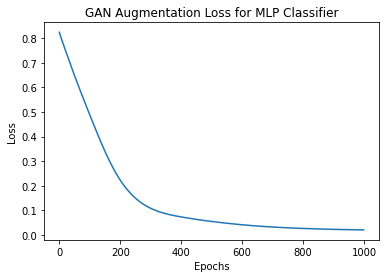

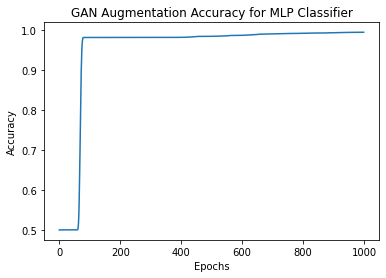

Predictions:  [[0.979018   0.02098206]
 [0.98936874 0.01063123]
 [0.98795533 0.01204475]
 ...
 [0.9835978  0.01640223]
 [0.98756856 0.01243148]
 [0.98845285 0.01154711]]
Class Counter({0: 4882, 1: 118})
Actual:  0    4842
1     158
Name: Class, dtype: int64
Accuracy: 0.9904
F1 score:  0.8260869565217391
confusion matrix:  [[4838    4]
 [  44  114]]
Accuracy:  99.04 %
Recall/Sensitivity:  0.72
Precision:  0.97
F1:  0.83
Specificity:  0.72
Confusion matrix :
 [[4838    4]
 [  44  114]]
AUC ROC:  0.86


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.97      0.72      0.83       158

    accuracy                           0.99      5000
   macro avg       0.98      0.86      0.91      5000
weighted avg       0.99      0.99      0.99      5000



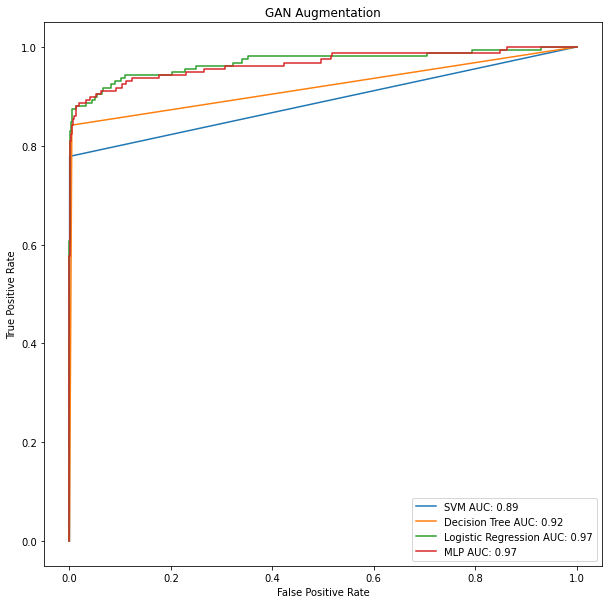

In [ ]:
results(df_augm,df_test,'GAN Augmentation')

SVM 

Accuracy:  99.32 %
Recall/Sensitivity:  0.79
Precision:  0.99
F1:  0.88
Specificity:  0.79
Confusion matrix :
 [[4841    1]
 [  33  125]]
AUC ROC:  0.9


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.99      0.79      0.88       158

    accuracy                           0.99      5000
   macro avg       0.99      0.90      0.94      5000
weighted avg       0.99      0.99      0.99      5000

Decision Tree

Accuracy:  99.02 %
Recall/Sensitivity:  0.85
Precision:  0.84
F1:  0.85
Specificity:  0.85
Confusion matrix :
 [[4816   26]
 [  23  135]]
AUC ROC:  0.92


classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4842
           1       0.84      0.85      0.85       158

    accuracy                           0.99      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.

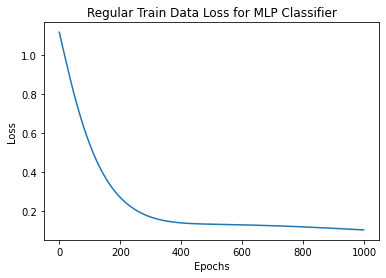

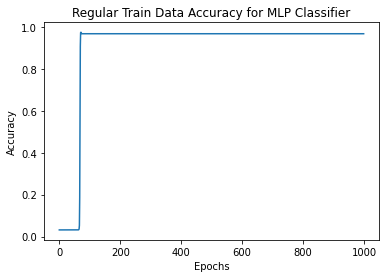

Predictions:  [[0.9742181  0.02578187]
 [0.96887076 0.0311293 ]
 [0.9696984  0.0303016 ]
 ...
 [0.97220504 0.02779497]
 [0.97349226 0.02650779]
 [0.9719248  0.02807521]]
Class Counter({0: 5000})
Actual:  0    4842
1     158
Name: Class, dtype: int64
Accuracy: 0.9684
F1 score:  0.0
confusion matrix:  [[4842    0]
 [ 158    0]]
Accuracy:  96.84 %
Recall/Sensitivity:  0.0
Precision:  0.0
F1:  0.0
Specificity:  0.0
Confusion matrix :
 [[4842    0]
 [ 158    0]]
AUC ROC:  0.5


classification report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4842
           1       0.00      0.00      0.00       158

    accuracy                           0.97      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.94      0.97      0.95      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

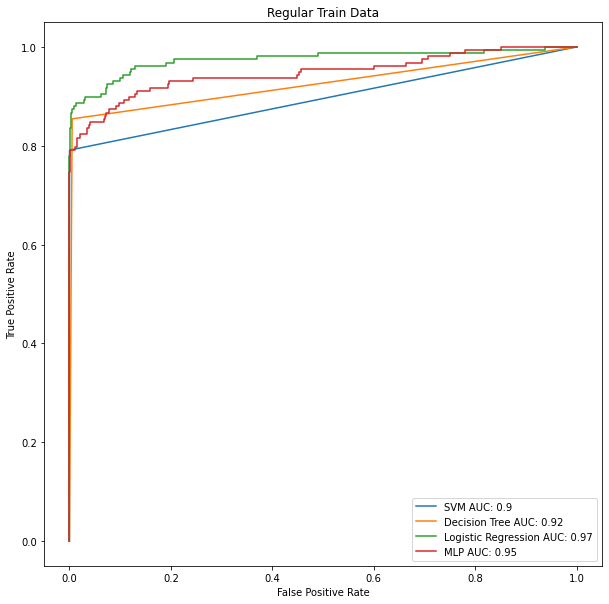

In [ ]:
results(df_train,df_test,"Regular Train Data")

SVM 

Accuracy:  97.7 %
Recall/Sensitivity:  0.9
Precision:  0.59
F1:  0.71
Specificity:  0.9
Confusion matrix :
 [[4743   99]
 [  16  142]]
AUC ROC:  0.94


classification report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4842
           1       0.59      0.90      0.71       158

    accuracy                           0.98      5000
   macro avg       0.79      0.94      0.85      5000
weighted avg       0.98      0.98      0.98      5000

Decision Tree

Accuracy:  99.16 %
Recall/Sensitivity:  0.85
Precision:  0.88
F1:  0.86
Specificity:  0.85
Confusion matrix :
 [[4824   18]
 [  24  134]]
AUC ROC:  0.92


classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4842
           1       0.88      0.85      0.86       158

    accuracy                           0.99      5000
   macro avg       0.94      0.92      0.93      5000
weighted avg       0.99

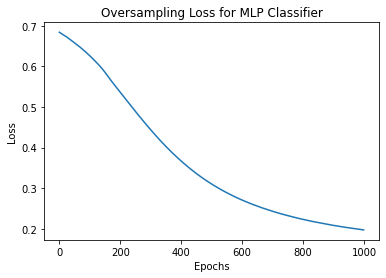

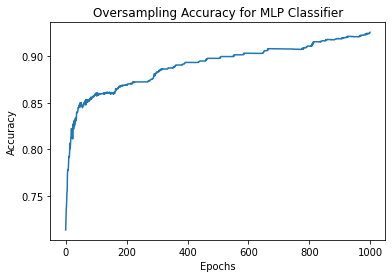

Predictions:  [[0.82513267 0.17486738]
 [0.8687482  0.13125183]
 [0.8615642  0.1384358 ]
 ...
 [0.8001664  0.19983353]
 [0.79157573 0.20842431]
 [0.8495141  0.15048587]]
Class Counter({0: 4829, 1: 171})
Actual:  0    4842
1     158
Name: Class, dtype: int64
Accuracy: 0.9894
F1 score:  0.8389057750759878
confusion matrix:  [[4809   33]
 [  20  138]]
Accuracy:  98.94 %
Recall/Sensitivity:  0.87
Precision:  0.81
F1:  0.84
Specificity:  0.87
Confusion matrix :
 [[4809   33]
 [  20  138]]
AUC ROC:  0.93


classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4842
           1       0.81      0.87      0.84       158

    accuracy                           0.99      5000
   macro avg       0.90      0.93      0.92      5000
weighted avg       0.99      0.99      0.99      5000



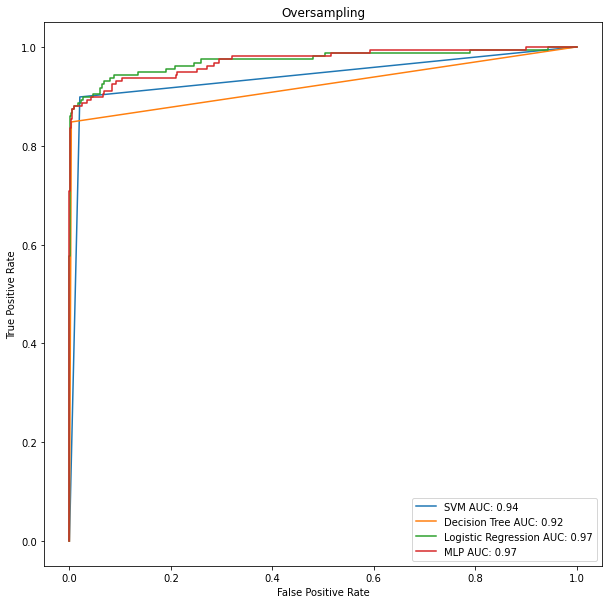

In [ ]:
df_over = over_sample(df_train)
results(df_over,df_test,"Oversampling")

In [ ]:
print("GAN data")
y_test,y_pred_svm = train_svm(df_augm,df_test)
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Regular data")
y_test,y_pred_svm = train_svm(df_train,df_test)
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Oversampling data")
y_test,y_pred_svm = train_svm(df_over,df_test)
metrics_all(y_test,y_pred_svm)

GAN data
Accuracy:  99.26 %
Recall/Sensitivity:  0.78
Precision:  0.98
F1:  0.87
Specificity:  0.78
Confusion matrix :
 [[4840    2]
 [  35  123]]
AUC ROC:  0.89


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.98      0.78      0.87       158

    accuracy                           0.99      5000
   macro avg       0.99      0.89      0.93      5000
weighted avg       0.99      0.99      0.99      5000

Regular data
Accuracy:  99.32 %
Recall/Sensitivity:  0.79
Precision:  0.99
F1:  0.88
Specificity:  0.79
Confusion matrix :
 [[4841    1]
 [  33  125]]
AUC ROC:  0.9


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.99      0.79      0.88       158

    accuracy                           0.99      5000
   macro avg       0.99      0.90      0.94      5000
weighted avg       0

In [ ]:
print("GAN data")
y_test,y_pred_svm,x = train_decisionTree(df_augm,df_test)
print(x)
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Regular data")
y_test,y_pred_svm,_ = train_decisionTree(df_train,df_test)
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Oversampling data")
y_test,y_pred_svm,_ = train_decisionTree(df_over,df_test)
metrics_all(y_test,y_pred_svm)

GAN data
[0. 0. 0. ... 0. 0. 0.]
Accuracy:  98.94 %
Recall/Sensitivity:  0.84
Precision:  0.83
F1:  0.83
Specificity:  0.84
Confusion matrix :
 [[4814   28]
 [  25  133]]
AUC ROC:  0.92


classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4842
           1       0.83      0.84      0.83       158

    accuracy                           0.99      5000
   macro avg       0.91      0.92      0.91      5000
weighted avg       0.99      0.99      0.99      5000

Regular data
Accuracy:  99.22 %
Recall/Sensitivity:  0.85
Precision:  0.9
F1:  0.87
Specificity:  0.85
Confusion matrix :
 [[4827   15]
 [  24  134]]
AUC ROC:  0.92


classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4842
           1       0.90      0.85      0.87       158

    accuracy                           0.99      5000
   macro avg       0.95      0.92      0.93      5

In [ ]:
print("GAN data")
y_test,y_pred_svm,_ = train_logistic(df_augm,df_test)
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Regular data")
y_test,y_pred_svm,_ = train_logistic(df_train,df_test)
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Oversampling data")
y_test,y_pred_svm,_ = train_logistic(df_over,df_test)
metrics_all(y_test,y_pred_svm)

GAN data
Accuracy:  99.06 %
Recall/Sensitivity:  0.72
Precision:  0.97
F1:  0.83
Specificity:  0.72
Confusion matrix :
 [[4839    3]
 [  44  114]]
AUC ROC:  0.86


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.97      0.72      0.83       158

    accuracy                           0.99      5000
   macro avg       0.98      0.86      0.91      5000
weighted avg       0.99      0.99      0.99      5000

Regular data
Accuracy:  99.14 %
Recall/Sensitivity:  0.73
Precision:  1.0
F1:  0.84
Specificity:  0.73
Confusion matrix :
 [[4842    0]
 [  43  115]]
AUC ROC:  0.86


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       1.00      0.73      0.84       158

    accuracy                           0.99      5000
   macro avg       1.00      0.86      0.92      5000
weighted avg       0

GAN data


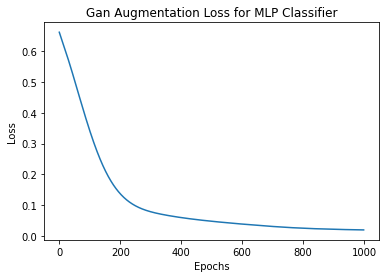

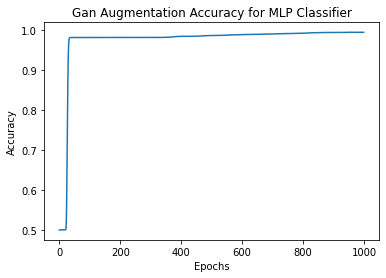

Predictions:  [[0.98810613 0.0118939 ]
 [0.9886429  0.01135715]
 [0.9858868  0.01411318]
 ...
 [0.9891026  0.01089741]
 [0.9911178  0.00888215]
 [0.9893171  0.01068282]]
Class Counter({0: 4881, 1: 119})
Actual:  0    4842
1     158
Name: Class, dtype: int64
Accuracy: 0.991
F1 score:  0.8375451263537906
confusion matrix:  [[4839    3]
 [  42  116]]
Accuracy:  99.1 %
Recall/Sensitivity:  0.73
Precision:  0.97
F1:  0.84
Specificity:  0.73
Confusion matrix :
 [[4839    3]
 [  42  116]]
AUC ROC:  0.87


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.97      0.73      0.84       158

    accuracy                           0.99      5000
   macro avg       0.98      0.87      0.92      5000
weighted avg       0.99      0.99      0.99      5000

Regular data


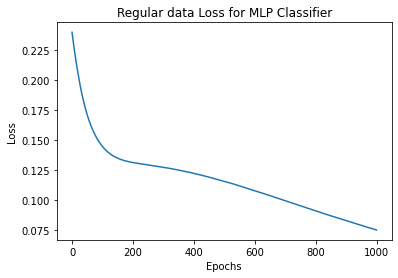

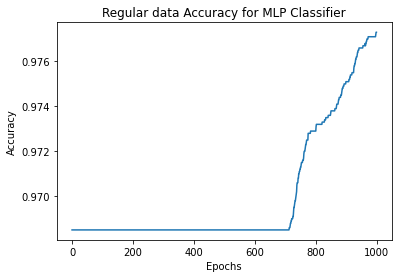

Predictions:  [[0.98338807 0.01661196]
 [0.9740926  0.02590743]
 [0.9765912  0.02340875]
 ...
 [0.9811008  0.01889916]
 [0.98368037 0.01631958]
 [0.9838365  0.01616351]]
Class Counter({0: 4954, 1: 46})
Actual:  0    4842
1     158
Name: Class, dtype: int64
Accuracy: 0.9776
F1 score:  0.45098039215686275
confusion matrix:  [[4842    0]
 [ 112   46]]
Accuracy:  97.76 %
Recall/Sensitivity:  0.29
Precision:  1.0
F1:  0.45
Specificity:  0.29
Confusion matrix :
 [[4842    0]
 [ 112   46]]
AUC ROC:  0.65


classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4842
           1       1.00      0.29      0.45       158

    accuracy                           0.98      5000
   macro avg       0.99      0.65      0.72      5000
weighted avg       0.98      0.98      0.97      5000

Oversampling data


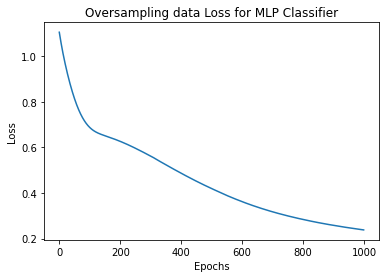

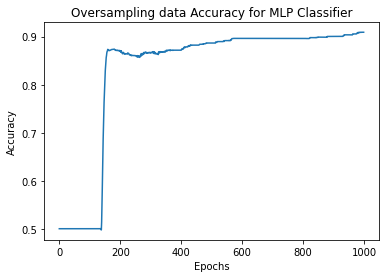

Predictions:  [[0.8104666  0.18953341]
 [0.81080365 0.18919636]
 [0.8201141  0.17988592]
 ...
 [0.8119819  0.18801807]
 [0.85606986 0.14393012]
 [0.81061596 0.1893841 ]]
Class Counter({0: 4864, 1: 136})
Actual:  0    4842
1     158
Name: Class, dtype: int64
Accuracy: 0.9924
F1 score:  0.8707482993197279
confusion matrix:  [[4834    8]
 [  30  128]]
Accuracy:  99.24 %
Recall/Sensitivity:  0.81
Precision:  0.94
F1:  0.87
Specificity:  0.81
Confusion matrix :
 [[4834    8]
 [  30  128]]
AUC ROC:  0.9


classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4842
           1       0.94      0.81      0.87       158

    accuracy                           0.99      5000
   macro avg       0.97      0.90      0.93      5000
weighted avg       0.99      0.99      0.99      5000



In [ ]:
print("GAN data")
y_test,y_pred_svm,_ = train_mlp(df_augm,df_test,'Gan Augmentation')
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Regular data")
y_test,y_pred_svm,_ = train_mlp(df_train,df_test, 'Regular data')
metrics_all(y_test,y_pred_svm)
print('='*50)
print("Oversampling data")
y_test,y_pred_svm,_ = train_mlp(df_over,df_test, 'Oversampling data')
metrics_all(y_test,y_pred_svm)

In [ ]:
df_augm.to_csv("GAN_Augmentation.csv",index=False)
df_over.to_csv("Oversampling.csv",index=False)